Завдання 1

Завантажую датасет diabetes

In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
diabetes_data = load_diabetes(as_frame=True)
diabetes = diabetes_data.frame

1. Вивести перших 5 рядків.

In [117]:
diabetes.head(5)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


2. Перевірити наявність пропусків. У разі виявлення замінити на середнє значення. 

In [118]:
missing_values = diabetes.isnull().sum()
missing_values

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

3. Перевірити наявність дублікатів, при виявленні – видалити. 

In [119]:
diabetes.duplicated().sum()

np.int64(0)

4. Замінити бінарні ознаки. У стовпчику «стать» спочатку перевірте унікальні значення. 

In [120]:
unique_values = diabetes['sex'].unique()
unique_values

array([ 0.05068012, -0.04464164])

In [121]:
diabetes['gender'] = pd.to_numeric(diabetes['sex'].apply(lambda x: "0" if x > 0 else "1"))
diabetes.drop('sex', axis=1, inplace=True)
diabetes.head()

,age,bmi,bp,s1,s2,s3,s4,s5,s6,target,gender
0,0.038076,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0,0
1,-0.001882,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0,1
2,0.085299,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0,0
3,-0.089063,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0,1
4,0.005383,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0,1


5. Перевірити тип даних. При необхідності замінити тип даних на числовий. 

In [122]:
diabetes.dtypes

age       float64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
gender      int64
dtype: object

6. Обчислити кореляцію між прогресом діабету і іншмим ознаками. Розташувати в порядку спадання. 
Побудувати теплову карту кореляції.

Кореляції з прогресом діабету (у порядку спадання):
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
gender   -0.043062
s3       -0.394789
Name: target, dtype: float64


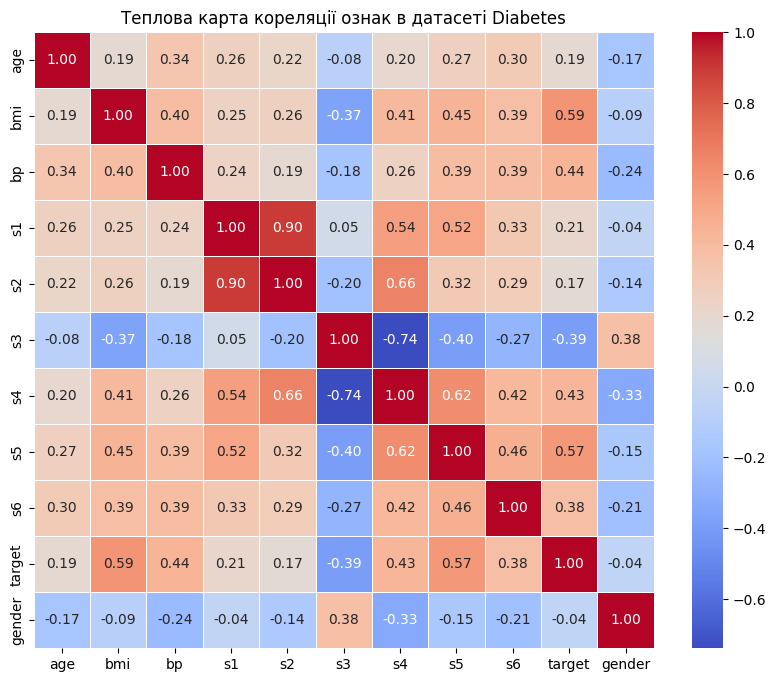

In [123]:
correlation_matrix = diabetes.corr()
correlation_with_target = correlation_matrix['target'].drop('target')
sorted_correlations = correlation_with_target.sort_values(ascending=False)

print("Кореляції з прогресом діабету (у порядку спадання):")
print(sorted_correlations)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Теплова карта кореляції ознак в датасеті Diabetes')
plt.show()

7. Масштабувати ознаки. 

In [124]:
features = diabetes.drop('target', axis=1)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
diabetes_scaled = pd.DataFrame(scaled_features, columns=features.columns)
diabetes_scaled


,age,bmi,bp,s1,s2,s3,s4,s5,s6,gender
0,0.800500,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989,-1.065488
1,-0.039567,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479,0.938537
2,1.793307,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154,-1.065488
3,-1.872441,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823,0.938537
4,0.113172,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568,0.938537
...,...,...,...,...,...,...,...,...,...,...
437,0.876870,0.413360,1.256040,-0.119769,-0.053957,-0.602843,-0.054499,0.655787,0.151508,-1.065488
438,-0.115937,-0.334410,-1.422086,1.037341,1.664355,-0.602843,0.721302,-0.380819,0.935254,-1.065488
439,0.876870,-0.334410,0.363573,-0.785107,-0.290965,-0.525441,-0.232934,-0.985649,0.325674,-1.065488
440,-0.956004,0.821235,0.025550,0.343075,0.321306,-0.602843,0.558384,0.936163,-0.545154,0.938537


8. Поділити дані на тренувальну і тестову вибірки.

In [125]:
X = diabetes.drop('target', axis=1)
y = diabetes['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Розмір тренувальної вибірки:", X_train.shape, y_train.shape)
print("Розмір тестової вибірки:", X_test.shape, y_test.shape)

Розмір тренувальної вибірки: (353, 10) (353,)
Розмір тестової вибірки: (89, 10) (89,)


9. Побудувати модель лінійной регресії і RandomForest регресії на основі більш корелюючих ознак (підібрати оптимальне число)

In [126]:
# Лінійна регресія
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
y_pred_linear = linear_model.predict(X_test)

# RandomForest регресія
forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
forest_model.fit(X_train, y_train)
y_pred_forest = forest_model.predict(X_test)
y_pred_forest

array([143.17, 171.9 , 157.42, 251.59, 104.85, 120.46, 232.69, 215.4 ,
       152.23, 184.76,  99.72, 185.28,  94.46, 241.49,  82.82, 134.74,
       240.61, 259.45, 166.33, 222.73, 157.79, 114.47,  70.9 , 200.04,
       144.24, 174.34, 192.17, 159.44,  71.64, 110.15, 164.45,  99.85,
       177.77, 212.43, 157.69, 202.88, 106.  , 114.41, 176.77,  75.88,
        74.96,  99.  , 172.45, 163.13, 168.11,  84.74,  72.97, 123.8 ,
        76.7 , 161.02, 101.57,  86.38, 183.13, 116.46, 186.36, 136.8 ,
       103.7 , 224.06,  92.91,  87.87, 158.21, 171.84, 142.65, 102.75,
       133.62, 226.09, 190.23, 181.71, 145.48, 151.27, 185.62, 190.5 ,
       207.9 , 110.1 ,  79.99, 159.51, 209.94, 166.77, 191.3 , 207.2 ,
       101.65, 112.66,  83.41,  77.4 ,  84.64,  71.71,  91.12,  76.73,
       156.42])

10. Вивести коефіцієнт детермінації і середньоквадратичну помилку

In [127]:
r2_linear = r2_score(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)

r2_forest = r2_score(y_test, y_pred_forest)
mse_forest = mean_squared_error(y_test, y_pred_forest)

print(f"Лінійна регресія: R2 = {r2_linear:.2f}, MSE = {mse_linear:.2f}")
print(f"RandomForest регресія: R2 = {r2_forest:.2f}, MSE = {mse_forest:.2f}")

Лінійна регресія: R2 = 0.45, MSE = 2900.19
RandomForest регресія: R2 = 0.44, MSE = 2983.83


11. Побудувати графіки.

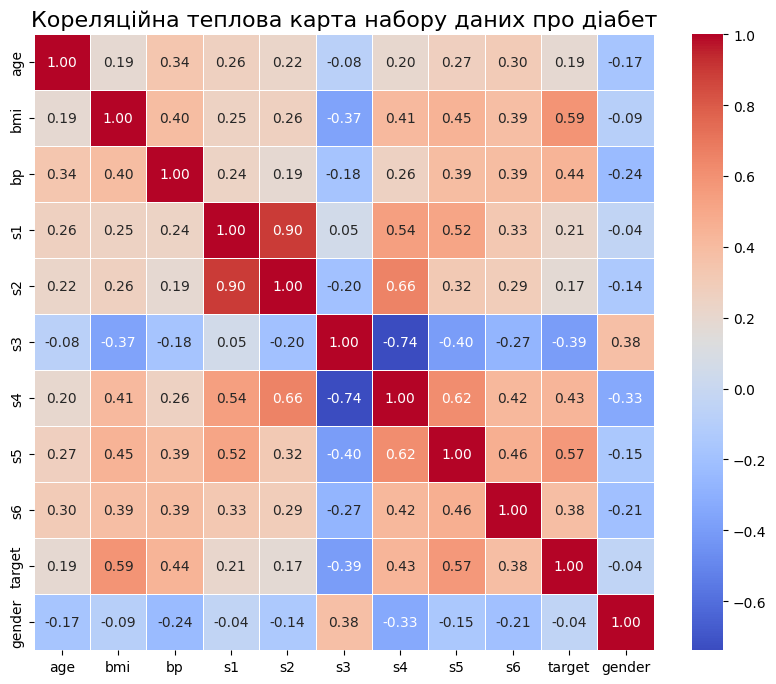

In [128]:
correlation_with_target = diabetes.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_with_target, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Кореляційна теплова карта набору даних про діабет', fontsize=16)

plt.show()

12. Вивести справжні і прогнозовані значення. 

In [129]:
comparison_df = pd.DataFrame({
    'True Values': y_test,
    'Predicted Values (Linear Regression)': y_pred_linear,
    'Predicted Values (RandomForest)': y_pred_forest
})

print(comparison_df.head(10))

     True Values  Predicted Values (Linear Regression)  \
287        219.0                            139.547558   
211         70.0                            179.517208   
72         202.0                            134.038756   
321        230.0                            291.417029   
73         111.0                            123.789659   
418         84.0                             92.172347   
367        242.0                            258.232389   
354        272.0                            181.337321   
281         94.0                             90.224113   
148         96.0                            108.633759   

     Predicted Values (RandomForest)  
287                           143.17  
211                           171.90  
72                            157.42  
321                           251.59  
73                            104.85  
418                           120.46  
367                           232.69  
354                           215.40  
281       

Завдання 2

Завантажити датасет California Housing Dataset, що містить інформацію про житло в Каліфорнії. Вивести перших 5 рядків. 

In [130]:
california_housing = fetch_california_housing(as_frame=True)
california_housing.frame.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


1. Провести попередній аналіз даних за схемою (дивиться вище). 

In [131]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [132]:
california_housing.frame.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [133]:
california_housing.frame.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


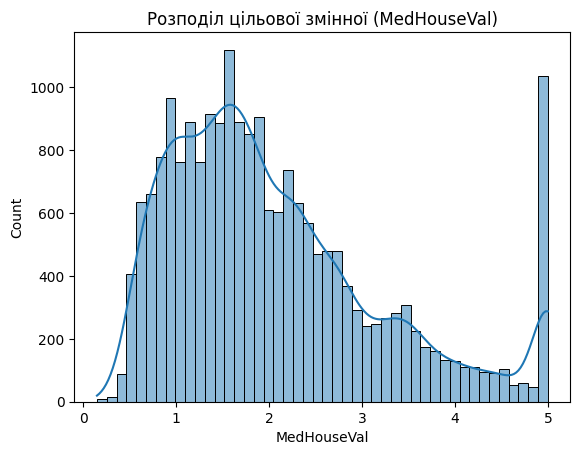

In [134]:
sns.histplot(california_housing.frame['MedHouseVal'], kde=True)
plt.title('Розподіл цільової змінної (MedHouseVal)')
plt.show()

2. Масштабувати ознаки.

In [135]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(california_housing.data)
scaled_df = pd.DataFrame(scaled_features, columns=california_housing.feature_names)
scaled_df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,2.344766,0.982143,0.628559,-0.153758,-0.974429,-0.049597,1.052548,-1.327835
1,2.332238,-0.607019,0.327041,-0.263336,0.861439,-0.092512,1.043185,-1.322844
2,1.782699,1.856182,1.155620,-0.049016,-0.820777,-0.025843,1.038503,-1.332827
3,0.932968,1.856182,0.156966,-0.049833,-0.766028,-0.050329,1.038503,-1.337818
4,-0.012881,1.856182,0.344711,-0.032906,-0.759847,-0.085616,1.038503,-1.337818
...,...,...,...,...,...,...,...,...
20635,-1.216128,-0.289187,-0.155023,0.077354,-0.512592,-0.049110,1.801647,-0.758826
20636,-0.691593,-0.845393,0.276881,0.462365,-0.944405,0.005021,1.806329,-0.818722
20637,-1.142593,-0.924851,-0.090318,0.049414,-0.369537,-0.071735,1.778237,-0.823713
20638,-1.054583,-0.845393,-0.040211,0.158778,-0.604429,-0.091225,1.778237,-0.873626


3. Поділити дані на тренувальні і тестові.

In [136]:
X_train, X_test, y_train, y_test = train_test_split(scaled_df, california_housing.target, test_size=0.2, random_state=42)

4. Побудувати 3 моделі: лін. Регресія, регресія випадковий ліс, Ridge. Підібрати оптимальні параметри за допомогою GridSeach.

In [137]:
lr = LinearRegression()
ridge = Ridge()
rf = RandomForestRegressor()

ridge_params = {'alpha': [0.1, 1, 10, 100]}
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}

ridge_grid = GridSearchCV(ridge, ridge_params, cv=5, scoring='r2')
ridge_grid.fit(X_train, y_train)

rf_grid = GridSearchCV(rf, rf_params, cv=5, scoring='r2')
rf_grid.fit(X_train, y_train)

lr.fit(X_train, y_train)

LinearRegression()

5. Вивести R2 і MSE. Побудувати графіки.

In [138]:
y_pred_lr = lr.predict(X_test)
y_pred_ridge = ridge_grid.predict(X_test)
y_pred_rf = rf_grid.predict(X_test)

# Виведення R² і MSE
print(f"Linear Regression: R²={r2_score(y_test, y_pred_lr):.2f}, MSE={mean_squared_error(y_test, y_pred_lr):.2f}")
print(f"Ridge Regression: R²={r2_score(y_test, y_pred_ridge):.2f}, MSE={mean_squared_error(y_test, y_pred_ridge):.2f}")
print(f"Random Forest: R²={r2_score(y_test, y_pred_rf):.2f}, MSE={mean_squared_error(y_test, y_pred_rf):.2f}")


Linear Regression: R²=0.58, MSE=0.56
Ridge Regression: R²=0.58, MSE=0.56
Random Forest: R²=0.81, MSE=0.25


6. Вивести справжні і прогнозовані значення.

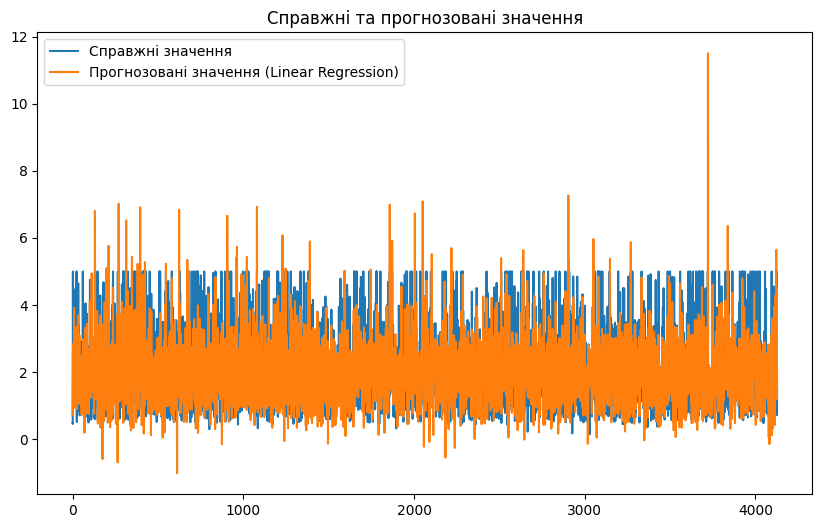

In [139]:
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Справжні значення")
plt.plot(y_pred_lr, label="Прогнозовані значення (Linear Regression)")
plt.legend()
plt.title('Справжні та прогнозовані значення')
plt.show()